# Visualización de datos

marcadores [aquí](https://matplotlib.org/api/markers_api.html?highlight=markers#module-matplotlib.markers)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import locale

# Cargando y ordenando los datos

incidencia_fc = pd.read_csv('../Datos/IDEFC_NM_may2020.csv', encoding = 'iso-8859-1', thousands = ',')
vars_id = incidencia_fc.columns.values[range(0, 7)]
incidencia_tidy = incidencia_fc.melt(id_vars = vars_id, 
                   var_name = 'Mes', 
                   value_name= 'Total')

locale.setlocale(locale.LC_TIME, 'es_ES')
incidencia_tidy = incidencia_tidy.assign(Periodo = lambda x: x.Año.astype('str') + '-' + x.Mes)
incidencia_tidy['Tiempo'] = pd.to_datetime(incidencia_tidy['Periodo'], format = "%Y-%B")
incidencia_tidy.set_index('Tiempo')

# Funciones para manipular los datos

def q25(series): 
    return np.quantile(series, 0.25)

def q75(series):
    return np.quantile(series, 0.75)

def make_estado(Estado):
    data_estado = (incidencia_tidy
                    .query('Entidad == @Estado')
                    .groupby(['Tiempo'])
                    .agg({'Total':sum})
                    )
    return(data_estado)

def robo_anual_entidad(Entidad):
    data_anual = (incidencia_tidy.query('Entidad == @Entidad and `Subtipo de delito`== "Robo a transeúnte en vía pública"')
                  .groupby(['Tiempo'])
                  .agg({'Total':sum}))
    data_anual = (data_anual.groupby(data_anual.index.strftime('%Y'))
                  .agg([sum, 'mean', 'std', 'min', 'max', q25, q75]))
    return data_anual     

In [2]:
aguas = make_estado('Aguascalientes')
yuca = make_estado('Yucatán')
robo_aguas = robo_anual_entidad('Aguascalientes')
robo_yuca = robo_anual_entidad('Yucatán')

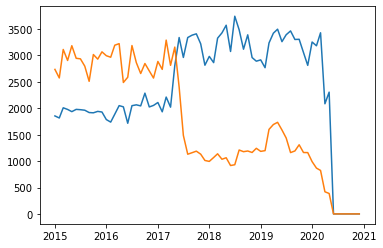

In [3]:

fig, ax = plt.subplots()

ax.plot(aguas['Total'])
ax.plot(yuca['Total'])

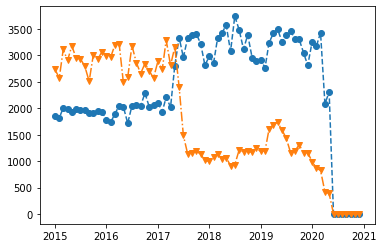

In [4]:

fig, ax = plt.subplots()
ax.plot(aguas['Total'], 
        marker = 'o', linestyle = '--')
ax.plot(yuca['Total'],
       marker = 'v', linestyle = '-.')

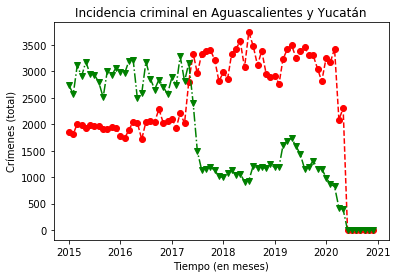

In [5]:

fig, ax = plt.subplots()
ax.plot(aguas['Total'], 
        marker = 'o', linestyle = '--', color = 'red')
ax.plot(yuca['Total'],
       marker = 'v', linestyle = '-.', color = 'green')

ax.set_xlabel('Tiempo (en meses)')  #Métodos "set_"
ax.set_ylabel('Crímenes (total)')
ax.set_title('Incidencia criminal en Aguascalientes y Yucatán')

plt.show()

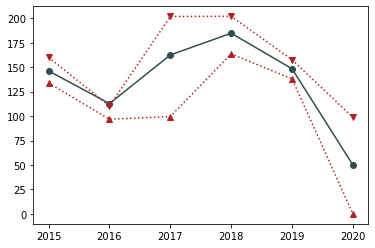

In [6]:

fig, ax = plt.subplots()

# La parte de aguascalientes
ax.plot(robo_aguas[('Total','mean')], marker = 'o', color = 'darkslategrey')
ax.plot(robo_aguas[('Total', 'q25')], marker = '^', color = 'firebrick', linestyle = ':')
ax.plot(robo_aguas[('Total', 'q75')], marker = 'v', color = 'firebrick', linestyle = ':')

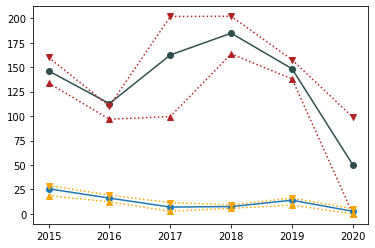

In [7]:

fig, ax = plt.subplots()

# La parte de aguascalientes
ax.plot(robo_aguas[('Total','mean')], marker = 'o', color = 'darkslategrey')
ax.plot(robo_aguas[('Total', 'q25')], marker = '^', color = 'firebrick', linestyle = ':')
ax.plot(robo_aguas[('Total', 'q75')], marker = 'v', color = 'firebrick', linestyle = ':')
# Añadimos yucatán
ax.plot(robo_yuca[('Total','mean')], marker = 'o')
ax.plot(robo_yuca[('Total', 'q25')], marker = '^', linestyle = ':', color = 'orange')
ax.plot(robo_yuca[('Total', 'q75')], marker = 'v', linestyle = ':', color = 'orange')

plt.show()



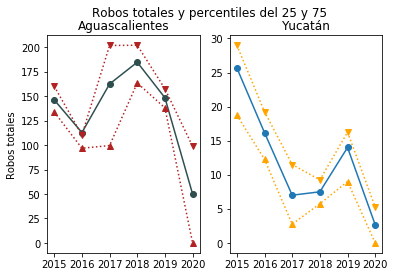

In [8]:

fig, ax = plt.subplots(1, 2)
ax[0].plot(robo_aguas[('Total','mean')], marker = 'o', color = 'darkslategrey')
ax[0].plot(robo_aguas[('Total', 'q25')], marker = '^', color = 'firebrick', linestyle = ':')
ax[0].plot(robo_aguas[('Total', 'q75')], marker = 'v', color = 'firebrick', linestyle = ':')

ax[1].plot(robo_yuca[('Total','mean')], marker = 'o')
ax[1].plot(robo_yuca[('Total', 'q25')], marker = '^', linestyle = ':', color = 'orange')
ax[1].plot(robo_yuca[('Total', 'q75')], marker = 'v', linestyle = ':', color = 'orange')

ax[0].set_title('Aguascalientes')
ax[1].set_title('Yucatán')

ax[0].set_ylabel('Robos totales')

fig.suptitle('Robos totales y percentiles del 25 y 75')

plt.show()

#### Tu turno

Otra forma de arreglar el problema del gráfico anterior es dar a cada curva su propio eje y.  En este ejercicio lo harás siguiendo los siguientes pasos:

1. Define `fig` y `ax` con `plt.subplots()`
2. Añade el gráfico de los robos totales de Aguascalientes
3. Nomina el eje x como `'Tiempo'` y el eje y como `'Aguascalientes (total)'`
4. Define `ax2` con el método `ax.twinx()` para generar un nuevo sistema coordenado.  Este sistema coordenado comparte la coordenada x con ax; pero tiene la coordenada y libre.  
5. En el eje ax2 añade el gráfico de los robos totales en Yucatán
6. Nomina el eje y de ax2 como `'Yucatán (total)'`
7. Agrega un título a tu gráfico

Si lo consideras necesario o útil, da un color distinto a cada línea y usa marcadores.  Si usas colores, añade el argumento `color = ...` al método `.set_ylabel()`

(array([736055., 736146., 736238., 736330., 736420., 736511., 736603.,
        736695., 736785.]),
 <a list of 9 Text xticklabel objects>)

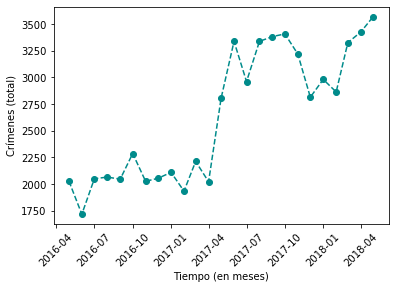

In [9]:
# OTRA COSA UTIL: EL ZOOM POR FECHAS
mis_años = aguas['2016-05-01':'2018-05-31']
fig, ax = plt.subplots()
ax.plot(mis_años['Total'], 
        marker = 'o', linestyle = '--', color = 'darkcyan')
ax.set_xlabel('Tiempo (en meses)')  #Métodos "set_"
ax.set_ylabel('Crímenes (total)')
plt.xticks(rotation=45)

## Comparaciones y resúmenes

In [10]:
def robos_nacional_año(año):
    robos_nacional = (incidencia_tidy
                 .query('Año == @año and `Subtipo de delito` == "Robo a transeúnte en vía pública"')
                 .groupby(['Entidad', 'Modalidad'])
                 .agg({'Total':sum})).unstack()  
    return robos_nacional

In [11]:
robos_2017 = robos_nacional_año(2017)
robos_2017.head()

Total              
Modalidad           Con violencia Sin violencia
Entidad                                        
Aguascalientes              659.0        1290.0
Baja California            3395.0        2287.0
Baja California Sur          54.0          20.0
Campeche                     42.0           0.0
Chiapas                     976.0         360.0

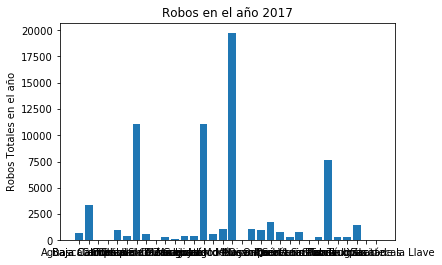

In [12]:

fig, ax = plt.subplots()

ax.set_title('Robos en el año 2017')

ax.bar(robos_2017.index, robos_2017[('Total', 'Con violencia')])
ax.set_ylabel('Robos Totales en el año')

plt.show()

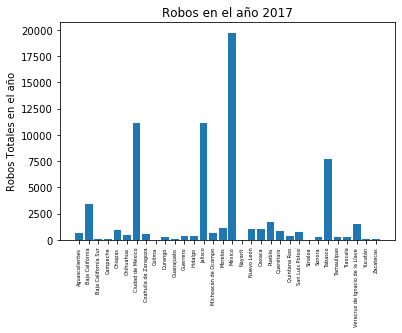

In [13]:

fig, ax = plt.subplots()

ax.set_title('Robos en el año 2017')

ax.bar(robos_2017.index, robos_2017[('Total', 'Con violencia')])

ax.set_ylabel('Robos Totales en el año')

ax.set_xticklabels(robos_2017.index, rotation = 90,
                  fontdict = {'fontsize': 5})

plt.show()

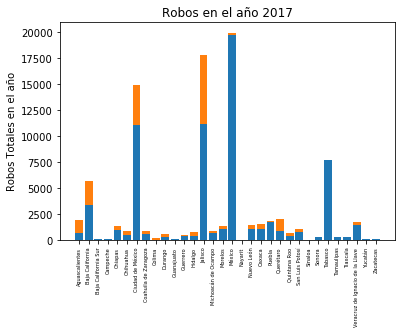

In [14]:

fig, ax = plt.subplots()

ax.set_title('Robos en el año 2017')

ax.bar(robos_2017.index, robos_2017[('Total', 'Con violencia')])
ax.set_ylabel('Robos Totales en el año')

ax.bar(robos_2017.index, robos_2017[('Total', 'Sin violencia')], bottom = robos_2017[('Total', 'Con violencia')])

ax.set_xticklabels(robos_2017.index, rotation = 90,
                  fontdict = {'fontsize': 5})

plt.show()

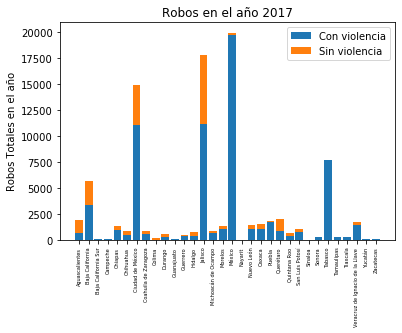

In [15]:

fig, ax = plt.subplots()

ax.set_title('Robos en el año 2017')

ax.bar(robos_2017.index, robos_2017[('Total', 'Con violencia')], label = 'Con violencia')

ax.set_ylabel('Robos Totales en el año')

ax.bar(robos_2017.index, robos_2017[('Total', 'Sin violencia')], bottom = robos_2017[('Total', 'Con violencia')], 
       label = 'Sin violencia')

ax.set_xticklabels(robos_2017.index, rotation = 90,
                  fontdict = {'fontsize': 5})
ax.legend()

plt.show()

## Tu turno
Repite la idea del gráfico anterior; pero genera un gráfico porcentual (la altura de la barra azul deberá ser el porcentaje de robos con violencia en cada entidad federativa).  Para ello:

1. Genera una nueva base de datos (desde incidencia_tidy) que contenga las columnas porcentuales (tendrás que calcularlas)
2. Sigue el procedimiento del gráfico anterior con estas nuevas columnas

### Histogramas

In [16]:
robos_2018 = incidencia_tidy.query('`Subtipo de delito`== "Robo a transeúnte en vía pública" and Año == 2018')
robos_2018_cdmx = robos_2018.query('Entidad == "Ciudad de México"')
robos_2018_edomx = robos_2018.query('Entidad == "México"')

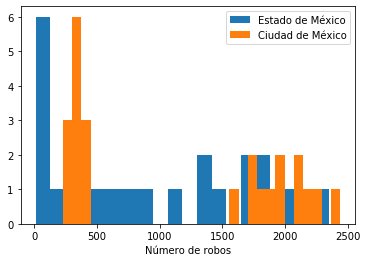

In [17]:

fig, ax = plt.subplots()
ax.hist(robos_2018_edomx['Total'], label = 'Estado de México', bins = 20) #key-word argument bins
ax.hist(robos_2018_cdmx['Total'], label = 'Ciudad de México', bins = 30)  #kew-word argument alpha
ax.set_xlabel('Número de robos')
ax.legend()


#### Tu turno
Utiliza un histograma con diferente número de `bins` para investigar el quilataje de los diamantes de la base `diamantes_clean`.

In [18]:
import datetime as dt
diamantes = pd.read_csv('../Datos/diamonds_factors.csv', parse_dates = [10])
diamantes['color'] = diamantes['color'].astype('category')
diamantes['price'] = diamantes['price'].str.strip('$').astype('float')
bad_records = diamantes['date_sold'] > dt.datetime.today()
index = diamantes[bad_records].index
diamantes.drop(index = index)
diamantes_clean = diamantes.drop_duplicates(keep = 'last')
diamantes_clean


,carat,cut,color,clarity,depth,table,price,x,y,z,date_sold
0,1.68,Very Good,3,VS2,61.1,60.0,15309.0,7.63,7.70,4.68,2009-03-30
1,0.38,Ideal,6,SI1,61.8,54.0,593.0,4.66,4.70,2.89,2007-05-10
2,1.20,Fair,4,I1,64.4,55.0,2655.0,6.77,6.61,4.31,2003-01-12
3,0.32,Premium,2,SI1,62.3,58.0,720.0,4.40,4.37,2.73,2007-05-31
4,0.50,Very Good,1,VS2,61.1,58.0,1646.0,5.07,5.11,3.11,2003-08-18
...,...,...,...,...,...,...,...,...,...,...,...
53939,0.54,Ideal,6,SI1,61.4,56.0,1114.0,5.25,5.27,3.23,2011-07-10
53940,0.38,Premium,3,VS2,60.9,56.0,1026.0,4.72,4.67,2.86,2016-05-23
53941,1.07,Ideal,6,VS1,62.0,53.0,5373.0,6.61,6.62,4.10,2011-12-04
53942,1.21,Good,4,SI1,63.8,58.0,5597.0,6.75,6.64,4.27,2006-10-03


### Boxplots

Text(0, 0.5, 'Robos totales')

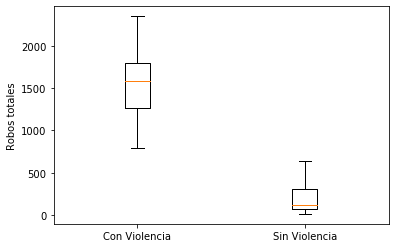

In [19]:

fig, ax = plt.subplots()

ax.boxplot([robos_2018_edomx.query('Modalidad == "Con violencia"')['Total'],
            robos_2018_edomx.query('Modalidad == "Sin violencia"')['Total']],
           labels = ['Con Violencia', 'Sin Violencia'])  # kwd-arg vert

ax.set_ylabel('Robos totales')


Puedes consultar mucha más información sobre el manejo de matplotlib en la [documentación oficial.](https://matplotlib.org/3.1.1/contents.html)

### Otros aspectos

Puedes cambiar el estilo de tus gráficos para la sesión usando el método `.style`.  Para saber cuáles tenemos disponibles hagamos `print(plt.style.available)` y para elegir uno de ellos usamos `plt.style.use('nombre_de_estilo')`.  Examínelos.


None


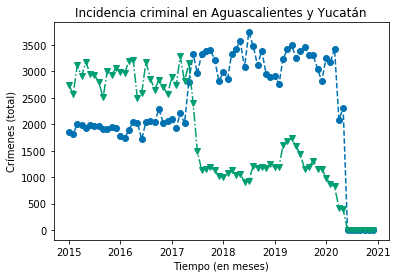

In [20]:
print(plt.style.use('seaborn-colorblind'))

fig, ax = plt.subplots()
ax.plot(aguas['Total'], 
        marker = 'o', linestyle = '--')
ax.plot(yuca['Total'],
       marker = 'v', linestyle = '-.')

ax.set_xlabel('Tiempo (en meses)')  #Métodos "set_"
ax.set_ylabel('Crímenes (total)')
ax.set_title('Incidencia criminal en Aguascalientes y Yucatán')

plt.show()

Puede guardar su figura cambiando `plt.show()` por `fig.savefig` cuya firma es 
```python
savefig(fname, dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None, metadata=None)
```
y puede consultarse [aquí].(https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html?highlight=savefig#matplotlib.figure.Figure.savefig)

None


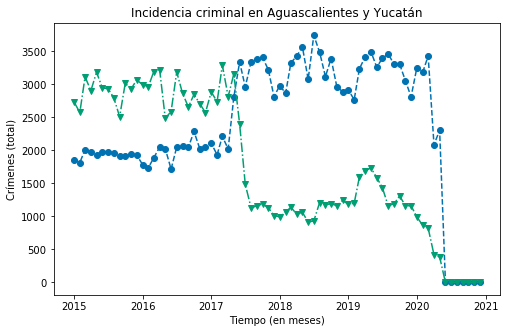

In [21]:
print(plt.style.use('seaborn-colorblind'))

fig, ax = plt.subplots(figsize = (8, 5))

ax.plot(aguas['Total'], 
        marker = 'o', linestyle = '--')
ax.plot(yuca['Total'],
       marker = 'v', linestyle = '-.')

ax.set_xlabel('Tiempo (en meses)')  #Métodos "set_"
ax.set_ylabel('Crímenes (total)')
ax.set_title('Incidencia criminal en Aguascalientes y Yucatán')

fig.savefig('../Productos/Grafico1.png', dpi = 300)

Puede cambiar las dimensiones de su figura con `fig.set_size_inches([weight, height])` si desea guardar en distintos tamaños. 

## A dónde ir ahora?

1. No deje de visitar [la galería de matplotlib](https://matplotlib.org/3.1.1/gallery/index.html) para aprender otros tipos de gráficos.
2. También puede ver [el tutorial de manejo de imágenes](https://matplotlib.org/tutorials/introductory/images.html).
3. El uso de [gráficos animados](https://matplotlib.org/api/animation_api).
4. [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) para datos geoespaciales.
5. [Seaborn]((https://seaborn.pydata.org/index.html) para gráficos estadísticos.

## Seaborn

>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Puede ver [el sitio oficial](https://seaborn.pydata.org/index.html)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


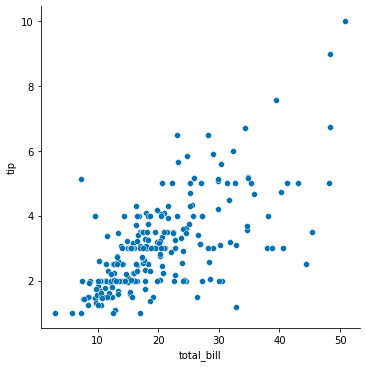

"\nfig, ax = plt.subplots()\nax.scatter(tips.total_bill, tips.tip, edgecolors = 'white')\n"

In [23]:

sns.relplot(x="total_bill", y="tip", data=tips)
plt.show()  # se construye sobre matplotlib
"""
fig, ax = plt.subplots()
ax.scatter(tips.total_bill, tips.tip, edgecolors = 'white')
"""

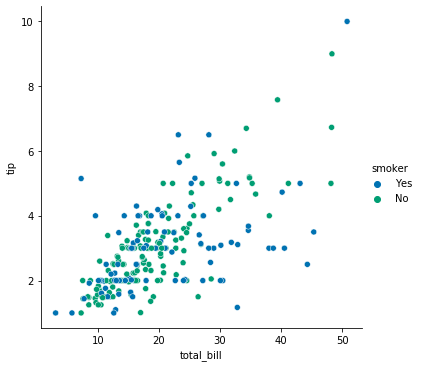

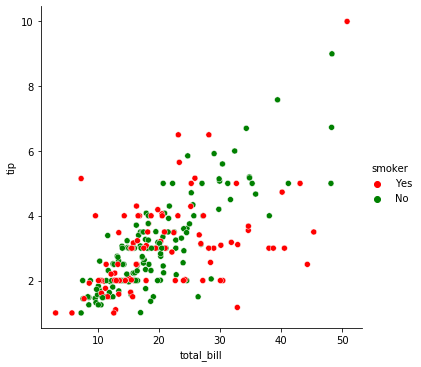

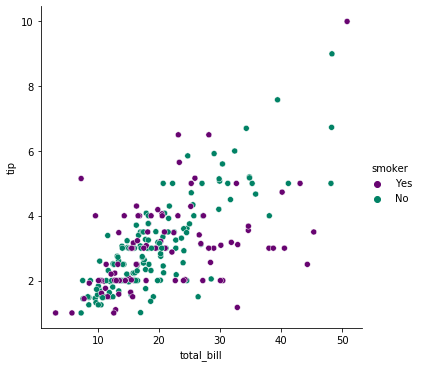

In [24]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)
hue_colors = {'Yes': 'red', 'No':'green'}
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips, palette = hue_colors)
hue_alternative = {'No': '#018265', 'Yes': '#680471'}
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips, palette = hue_alternative)
# hue_order

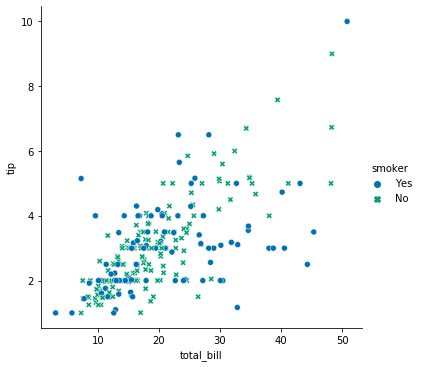

In [25]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips)

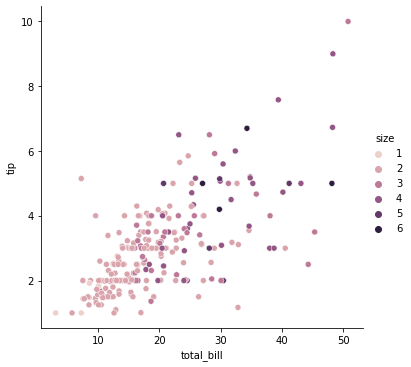

In [26]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips) #La escala con un float-eable es un gradiente

Para saber más sobre las paletas de color, puede visitarse [esta página](https://seaborn.pydata.org/tutorial/color_palettes.html).  En variables categóricas tenemos :

1.  Colores con saltos uniformes en el tono con `sns.hls_palette(n, h, l, s)` y `sns.husl_palette(n, h, s, l)` 
2.  Paletas conformadas por el [ColorBrewer](https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3).  Seaborn cuenta con las paletas `deep`, `muted`, `bright`, `pastel`, `dark`, y `colorblind`. 
3.  Paletas del tipo [Cube Helix](https://jiffyclub.github.io/palettable/cubehelix/) (que también se usan en la representación de escalas continuas de color).

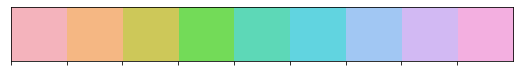

In [27]:
sns.palplot(sns.husl_palette(9, s = 0.8, l = 0.8))

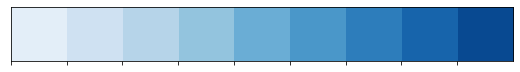

In [28]:
sns.palplot(sns.color_palette('Blues', 9))

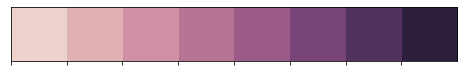

In [29]:
sns.palplot(sns.cubehelix_palette(8))

#### Tu turno

Utiliza la base de datos de diamantes, disponible en https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv para realizar los siguientes gráficos:

1. Un diagrama de dispersión que muestre la relación entre quilataje (carat) y precio (price).  Puede utilizar el agrumento `edgecolor = None` para evitar los contornos blancos en los puntos
2. Utilice `plt.xscale('log')` para cambiar la escala del eje X a logarítmica.  Haga lo mismo en el eje Y. Utilice el argumento `alpha` para modular la transparencia del gráfico.
3. Muestree la base original para quedarse con únicamente 200 observaciones usando el método `.sample()`
4. Con esta nueva base, grafique la relación entre quilataje y precio coloreada por la variable `color`
5. Repita el paso anterior; pero esta vez utilice la variable `cut` para definir el marcador (deje un mismo color para todos los puntos)

In [30]:
import pandas as pd
diamonds = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv')

### Smoothers para describir una relación

Típicamente pensando en la forma $Y = f(X, \varepsilon)$.

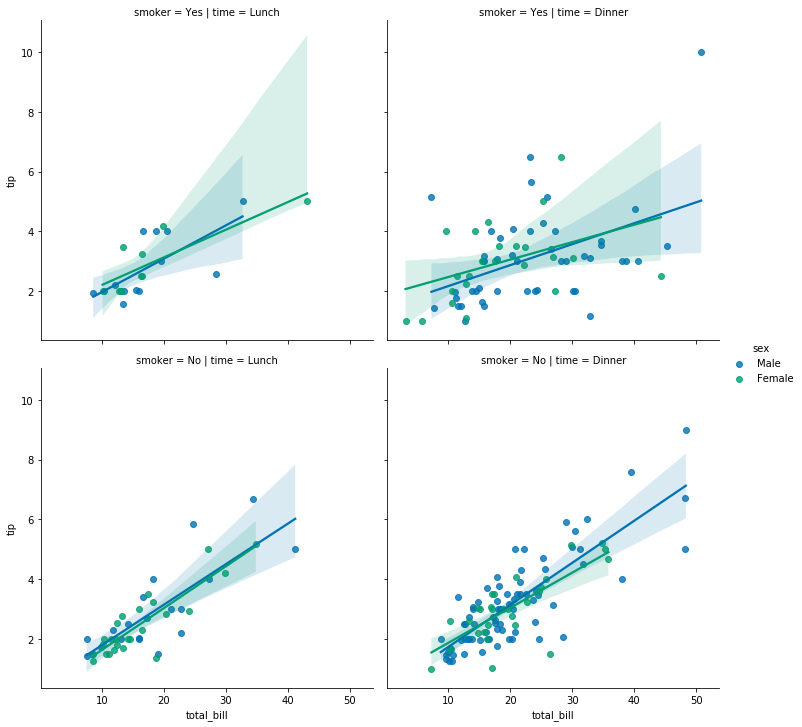

In [31]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue = 'sex', col = 'time', row = 'smoker', aspect = 1)
# col, col_wrap, col_order

### Variables categóricas `catplot`

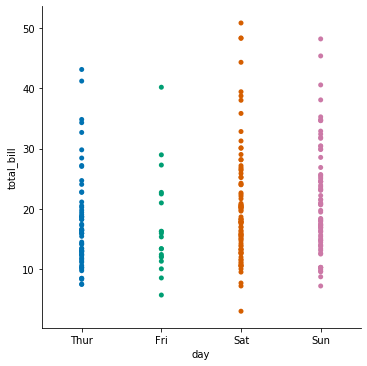

In [32]:
sns.catplot(x="day", y="total_bill", data=tips, jitter = False) #kind = 'swarm'

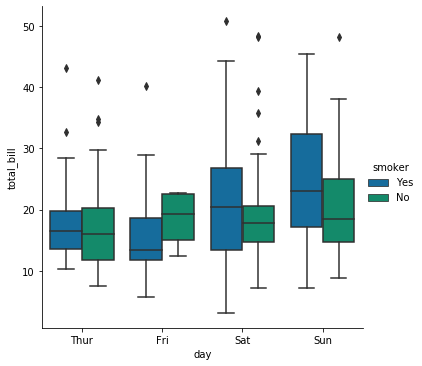

In [33]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'box', hue = 'smoker') #kind = boxen, violin
# arg sym = '' para evitar ver los outlierss
#     whis = n para whiskers @ n*iqr; whis = [p_1, p_2] para usar cuantiles



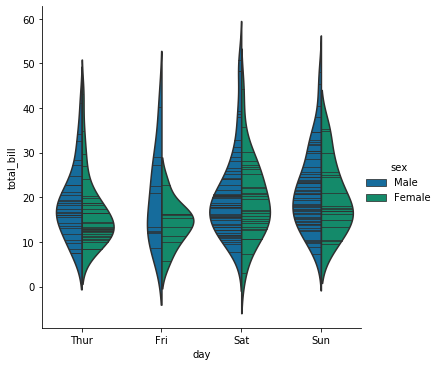

In [34]:
sns.catplot(x  = 'day', y = 'total_bill', hue = 'sex', kind = 'violin', split = True, inner = 'stick', data=tips)

In [35]:
titanic = sns.load_dataset('titanic')

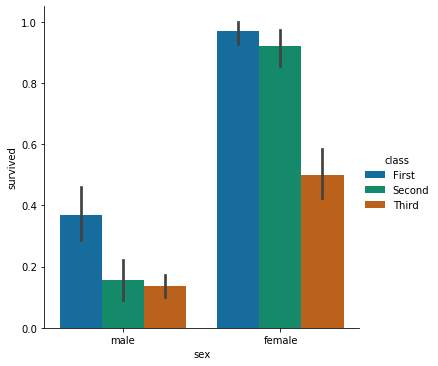

In [36]:
sns.catplot(x = 'sex', y = 'survived',  data = titanic, hue = 'class', kind = 'bar' )

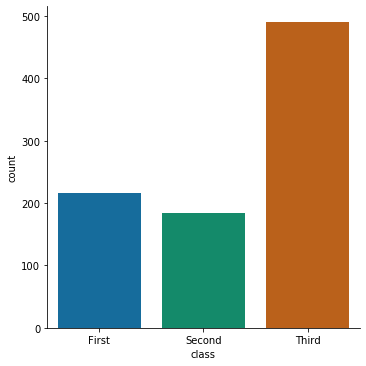

In [37]:
sns.catplot(x = 'class', kind = 'count', data = titanic)  # switch orientation too

#### Tu turno

Describe las variables corte, color, y claridad de la base de datos `diamonds` usando barras y matizando la relación con color o facetas.

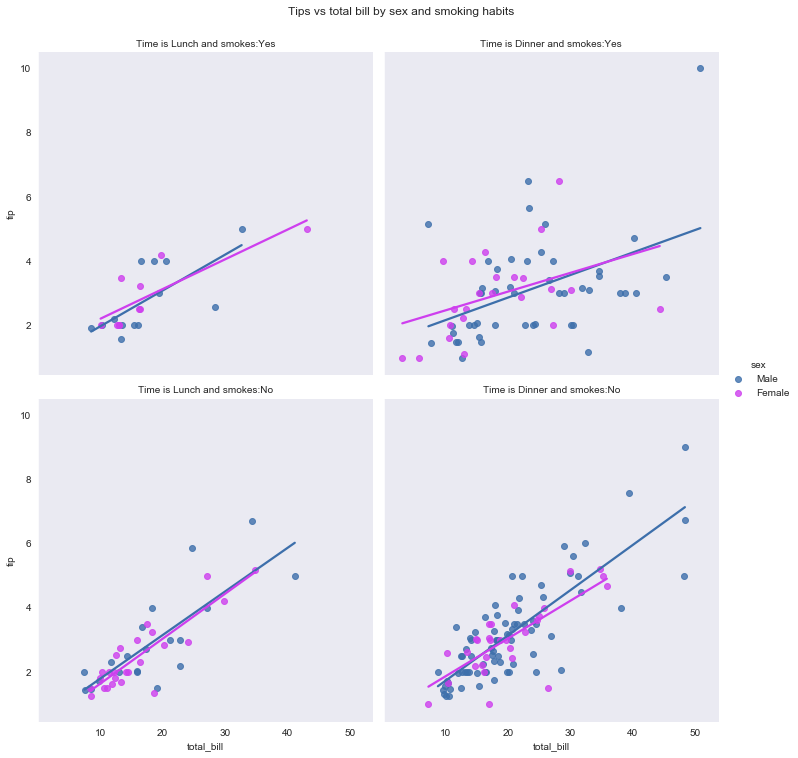

In [65]:
sns.set_style('dark')
sns.set_palette(['#3D6FAB', '#CE3FEE'])

g = sns.lmplot(x="total_bill", y="tip", data=tips,
               hue = 'sex', col = 'time', row = 'smoker', 
               aspect = 1, ci = None)

g.fig.suptitle('Tips vs total bill by sex and smoking habits', y = 1.03)
g.set_titles('Time is {col_name} and smokes:{row_name}')

plt.show()
sns.set()

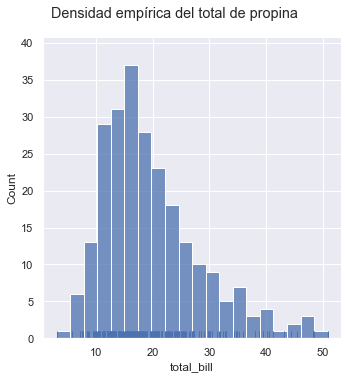

In [66]:
d = sns.displot(tips.total_bill, kde = False, rug = True, bins = 20)
d.fig.suptitle('Densidad empírica del total de propina', y = 1.05)
plt.show()

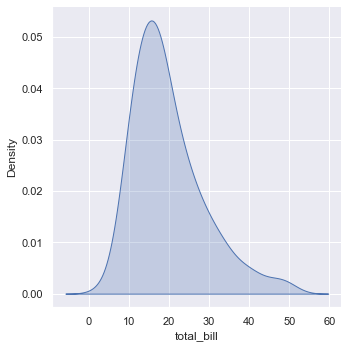

In [67]:
sns.displot(tips.total_bill, kind = 'kde', fill=True)
plt.show()

/Users/nel/opt/anaconda3/envs/Diplomadoenv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Propina Total'),
 Text(0.5, 1.0, 'Densidad empírica')]

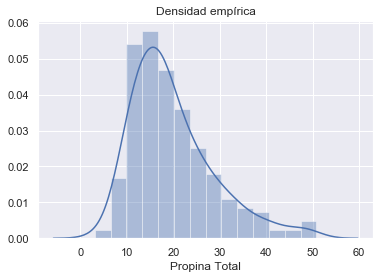

In [72]:
fig, ax = plt.subplots()
sns.distplot(tips.total_bill, ax = ax)
ax.set(xlabel = 'Propina Total',
       ylabel = '',
       title='Densidad empírica')